In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [11]:
def calculate_loss(preds, true_values):
    loss =  (1/ len(preds)) \
    *  np.sum(-1 * ( true_values * np.log(preds) + (1-true_values) * np.log(1  - preds)))
    return loss

In [12]:
def calculate_gradients(data, preds, true_values):
    da0 = np.sum((preds - true_values) * data)
    da1 =  np.sum((preds - true_values))
    return da0, da1

In [13]:
def update_values(learning_rate, a0, a1, da0, da1):
    a0 = a0 - learning_rate * da0
    a1 = a1 - learning_rate * da1
    return a0, a1

In [14]:
def plot_fitting(X_data, y_data, preds, loss, i, ax):
    ax[int(num_plot / 2), num_plot % 2 ].scatter(
        X_data[np.where(preds > 0.5)], preds[np.where(preds > 0.5)], color='green', label=1)
    ax[int(num_plot / 2), num_plot % 2 ].scatter(
        X_data[np.where(preds < 0.5)], preds[np.where(preds < 0.5)], color='red', label=0)
    ax[int(num_plot / 2), num_plot % 2 ].legend()
    ax[int(num_plot / 2), num_plot % 2 ].title.set_text(f'epoch number: {i}, loss: {loss:.2f}')

In [15]:
X_train = np.arange(10) #array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
lr = 0.01
alfa0, alfa1 = 0.0, 0.0 

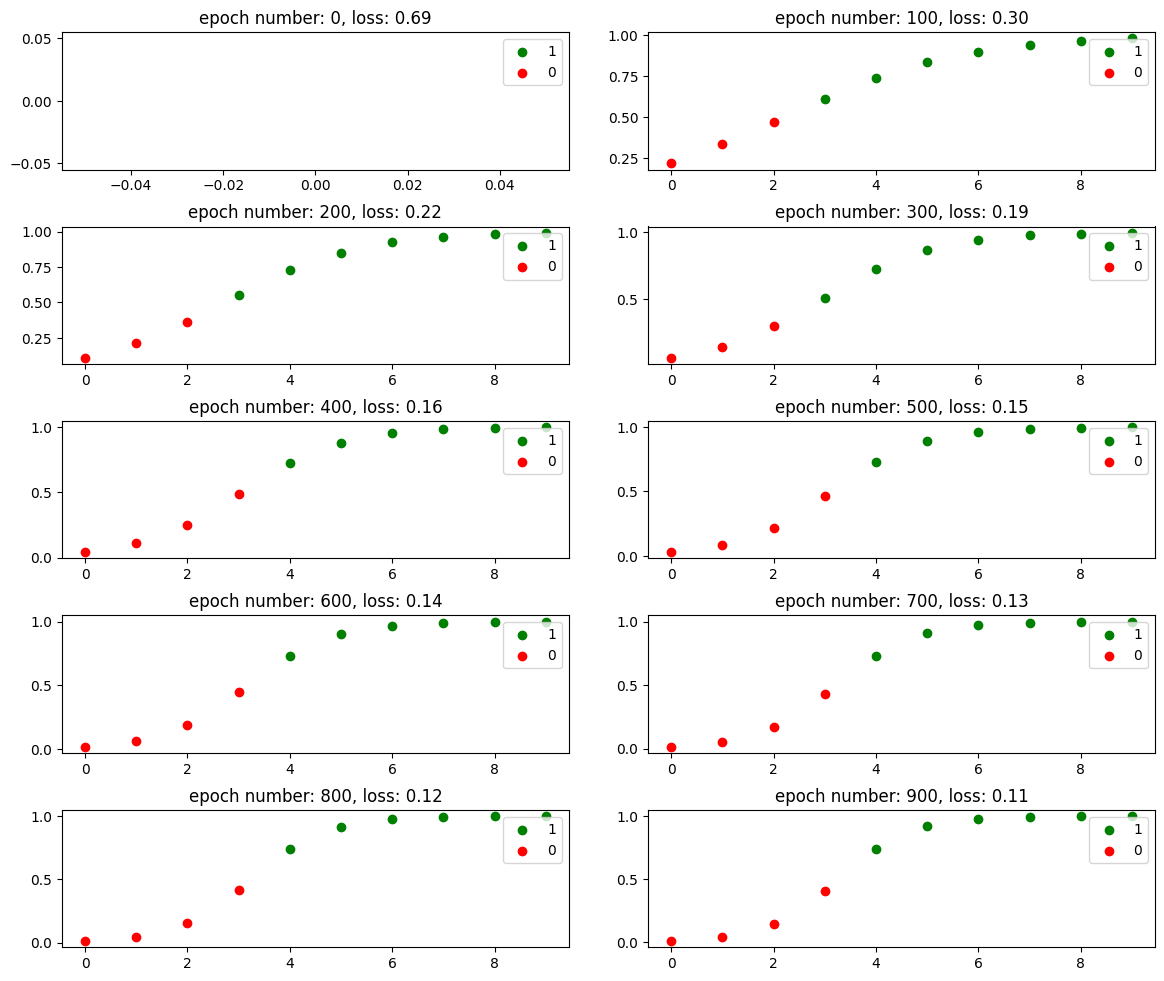

In [16]:
fig, ax = plt.subplots(5,2, figsize=(12,10))
fig.tight_layout(pad=2.0)
num_plot = 0
num_epochs = 1000
for i in range(num_epochs):
    #make predictions on train data
    preds = sigmoid(X_train * alfa0 + alfa1)
    #calculate loss based on predictions
    loss = calculate_loss(preds, y_train)
    #calculate gradients essential for parameters update
    da0, da1 = calculate_gradients(X_train, preds, y_train)
    #updating parameters\n",
    alfa0, alfa1 = update_values(lr, alfa0, alfa1, da0, da1)

    if i % (num_epochs // 10) == 0:\
        #plotting results of training every x epochs
        plot_fitting(X_train, y_train, preds, loss, i, ax)
        num_plot +=1
plt.show()